In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import spacy
#import community as community_louvain
from community import community_louvain

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
#load preprocessed data
preprocessed_data = pd.read_csv('Ukraine_v2_preprocessed.csv')
preprocessed_data.head()

,article_title,author,published_time,article_text
0,"NATO, US put Ukraine’s EU membership in dilemma",By Global Times,"Published: Jun 22, 2022 11:21 PM",Illustration: Chen Xian/Global TimesUkraine is...
1,Xi offers answers to questions of the times at...,By \n\n\n\n\n Yang Sheng \nYang Sheng is a chi...,"Published: Jun 23, 2022 12:07 AM",China President Xi Jinping delivers a keynote ...
2,Wild ambition of NATO against public’s will,By Lu Xue,"Published: Jun 23, 2022 12:23 AM",Illustration: Liu Rui/Global TimesEditor's Not...
3,Egyptian Red Sea resort Sharm el-Sheikh reels ...,By Reuters,"Published: Jun 23, 2022 04:10 PM","A picture taken on September 29, 2021 shows Ru..."
4,BRICS provides new voices in transformative world,By Santiago Bustelo,"Published: Jun 23, 2022 05:04 PM",Illustration: Chen Xia/GTIn the last decade th...


In [ ]:
entities = [
    "Russia", "Moscow", "China", "Beijing", "Ukraine",
    "Kiev", "US", "France", "West", "Joe Biden",
    "Xi Jinping", "Vladimir Putin", "Wang Yi", "Antony Blinken", "Volodymyr Zelensky",
    "Donald Trump", "Emmanuel Macron", "EU",
    "NATO", "UN", "EU Commission", "EU Council"
]  #"Covid-19"

# Relationship with co-occurence based in same sentence

In [ ]:
#initialize graph
G = nx.Graph()

#add nodes for each entity
for entity in entities:
    G.add_node(entity)

In [ ]:
co_occurrence = defaultdict(int)

In [ ]:
#iterate through the articles and process with SpaCy to get sentences
for article in preprocessed_data['article_text']:
    doc = nlp(article)
    sentences = [sent.text for sent in doc.sents]
    #print(sentences)

    #iterate through each sentence in the article
    for sentence in sentences:
        present_entities = [entity for entity in entities if entity in sentence]
        #print(present_entities)
        for i in range(len(present_entities)):
            for j in range(i + 1, len(present_entities)):
                co_occurrence[(present_entities[i], present_entities[j])] += 1
                #print(co_occurrence)

In [ ]:
co_occurrence

defaultdict(int,
            {('Ukraine', 'EU'): 764,
             ('Russia', 'Ukraine'): 3369,
             ('Russia', 'EU'): 1047,
             ('US', 'EU'): 879,
             ('US', 'NATO'): 596,
             ('EU', 'NATO'): 326,
             ('Ukraine', 'West'): 547,
             ('China', 'Ukraine'): 1611,
             ('China', 'EU'): 721,
             ('China', 'NATO'): 264,
             ('Ukraine', 'NATO'): 440,
             ('Moscow', 'Kiev'): 57,
             ('Moscow', 'NATO'): 22,
             ('Kiev', 'NATO'): 18,
             ('Russia', 'Vladimir Putin'): 392,
             ('Russia', 'NATO'): 539,
             ('Ukraine', 'Vladimir Putin'): 227,
             ('Vladimir Putin', 'EU'): 40,
             ('Vladimir Putin', 'NATO'): 38,
             ('West', 'EU'): 158,
             ('Moscow', 'West'): 67,
             ('Kiev', 'West'): 25,
             ('Ukraine', 'France'): 129,
             ('Ukraine', 'Emmanuel Macron'): 34,
             ('France', 'Emmanuel Macron'): 67,


In [ ]:
#define a threshold for edge weights for visualization purposes
weight_threshold = 10

In [ ]:
#add edges with weights to the graph, filtering by the threshold
selected_edges = []
for (entity1, entity2), weight in co_occurrence.items():
    if weight >= weight_threshold:
        G.add_edge(entity1, entity2, weight=weight)
        selected_edges.append((entity1, entity2, weight))

In [ ]:
selected_edges

[('Ukraine', 'EU', 764),
 ('Russia', 'Ukraine', 3369),
 ('Russia', 'EU', 1047),
 ('US', 'EU', 879),
 ('US', 'NATO', 596),
 ('EU', 'NATO', 326),
 ('Ukraine', 'West', 547),
 ('China', 'Ukraine', 1611),
 ('China', 'EU', 721),
 ('China', 'NATO', 264),
 ('Ukraine', 'NATO', 440),
 ('Moscow', 'Kiev', 57),
 ('Moscow', 'NATO', 22),
 ('Kiev', 'NATO', 18),
 ('Russia', 'Vladimir Putin', 392),
 ('Russia', 'NATO', 539),
 ('Ukraine', 'Vladimir Putin', 227),
 ('Vladimir Putin', 'EU', 40),
 ('Vladimir Putin', 'NATO', 38),
 ('West', 'EU', 158),
 ('Moscow', 'West', 67),
 ('Kiev', 'West', 25),
 ('Ukraine', 'France', 129),
 ('Ukraine', 'Emmanuel Macron', 34),
 ('France', 'Emmanuel Macron', 67),
 ('France', 'EU', 142),
 ('Emmanuel Macron', 'EU', 18),
 ('China', 'Xi Jinping', 173),
 ('Beijing', 'Ukraine', 66),
 ('Ukraine', 'Xi Jinping', 55),
 ('China', 'US', 3104),
 ('China', 'West', 612),
 ('US', 'West', 578),
 ('West', 'NATO', 83),
 ('Russia', 'China', 1590),
 ('Russia', 'US', 2231),
 ('Russia', 'Beijing',

In [ ]:
#calculate node strength -- the sum of the weights of edges connected to them
node_strength = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes}
max_strength = max(node_strength.values())

In [ ]:
#normalize node sizes based on their strength
node_sizes = [node_strength[node] / max_strength * 1000 for node in G.nodes]

In [ ]:
#apply the Louvain method for community detection
partition = community_louvain.best_partition(G, weight='weight')

In [ ]:
partition

{'Russia': 1,
 'Moscow': 1,
 'China': 2,
 'Beijing': 2,
 'Ukraine': 1,
 'Kiev': 1,
 'US': 2,
 'France': 0,
 'West': 1,
 'Joe Biden': 2,
 'Xi Jinping': 2,
 'Vladimir Putin': 1,
 'Wang Yi': 2,
 'Antony Blinken': 2,
 'Volodymyr Zelensky': 1,
 'Donald Trump': 2,
 'Emmanuel Macron': 0,
 'EU': 0,
 'NATO': 0,
 'UN': 1,
 'EU Commission': 0,
 'EU Council': 0}

In [ ]:
#add the community information to the graph
for node, community in partition.items():
    G.nodes[node]['community'] = community

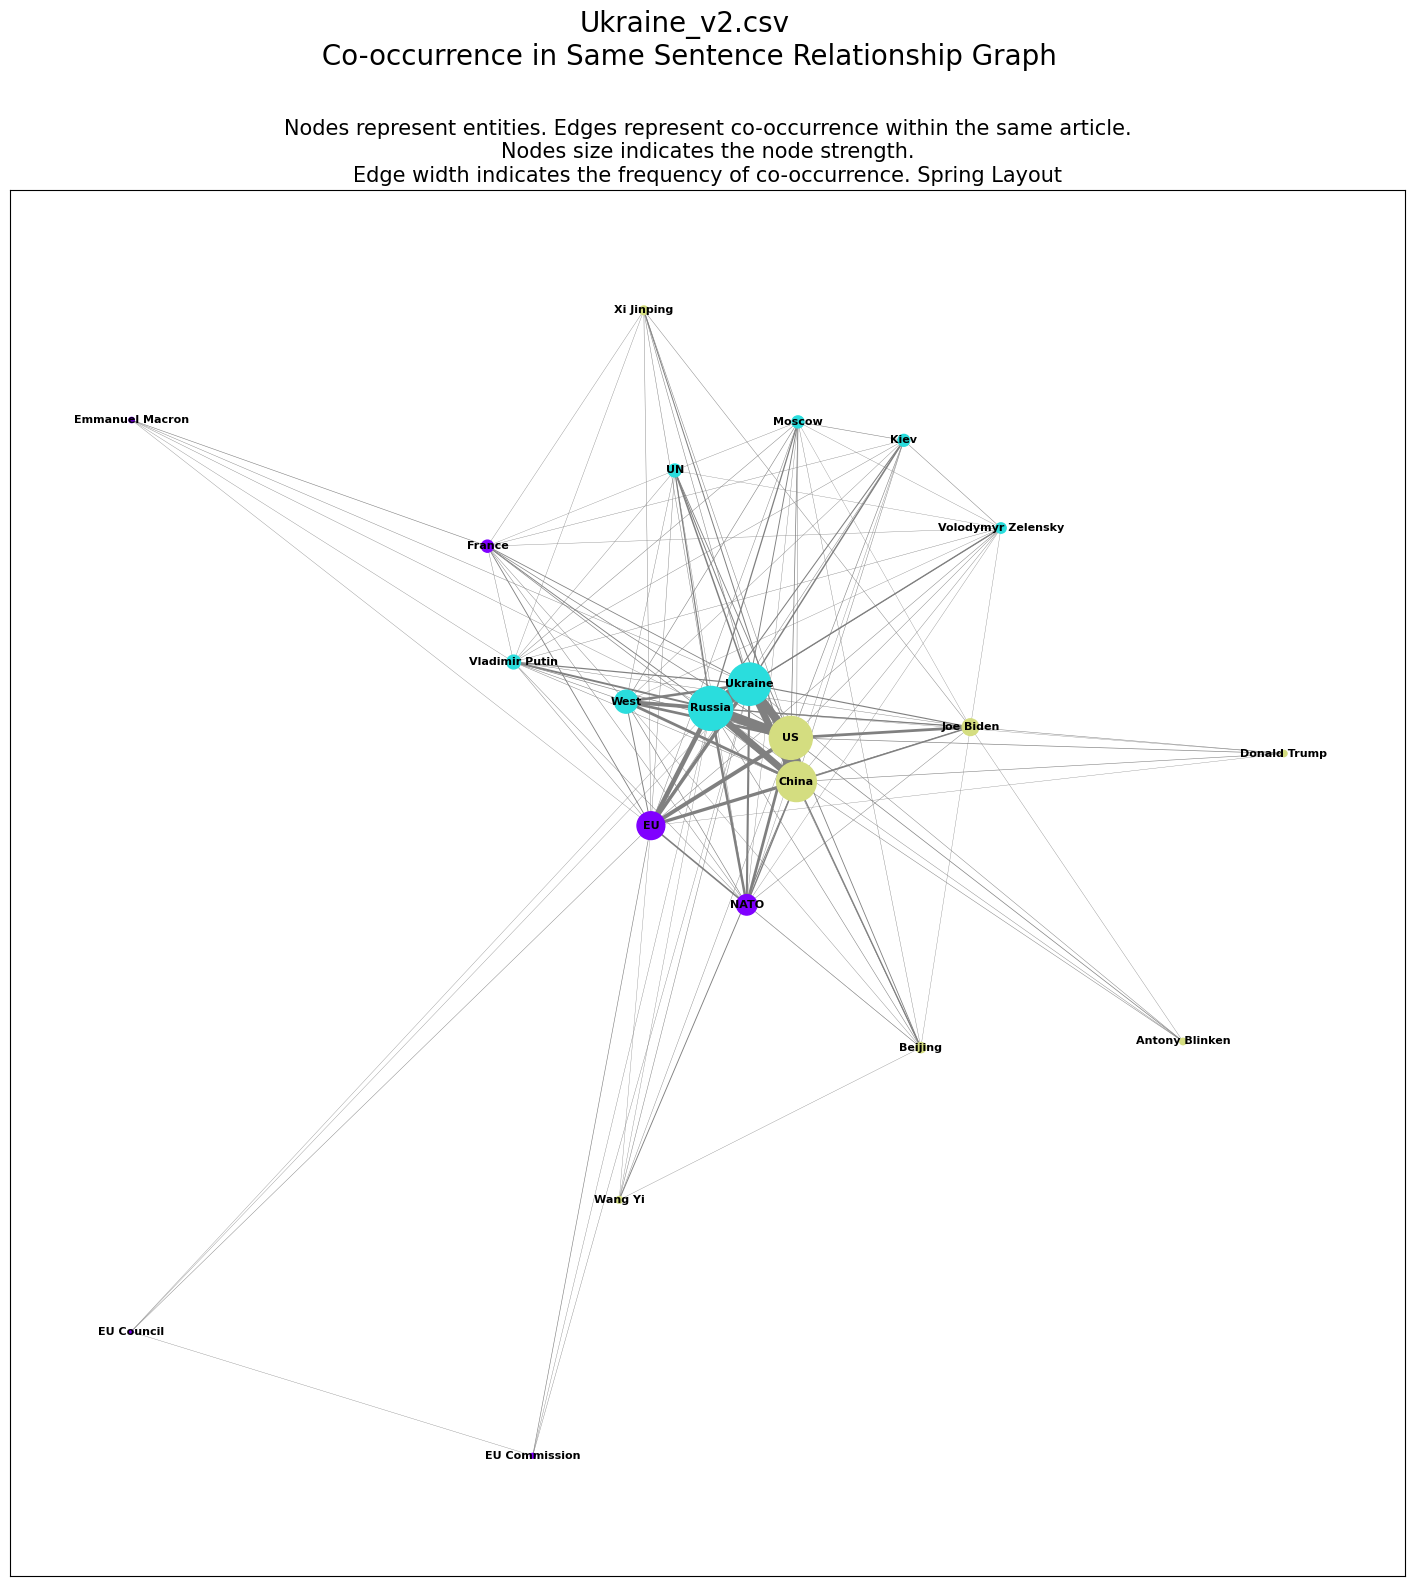

In [ ]:
#draw the graph
plt.figure(figsize=(18, 18))
pos = nx.spring_layout(G)

#get the community color map
communities = set(partition.values())
colors = [plt.cm.rainbow(i / len(communities)) for i in range(len(communities))]
node_colors = [colors[partition[node]] for node in G.nodes]

#draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.rainbow, node_color=node_colors)

#draw edges with normalized weights
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')

#draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

#title
plt.suptitle("Ukraine_v2.csv\n Co-occurrence in Same Sentence Relationship Graph", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nNodes size indicates the node strength.\nEdge width indicates the frequency of co-occurrence. Spring Layout", fontsize=15)
plt.show()

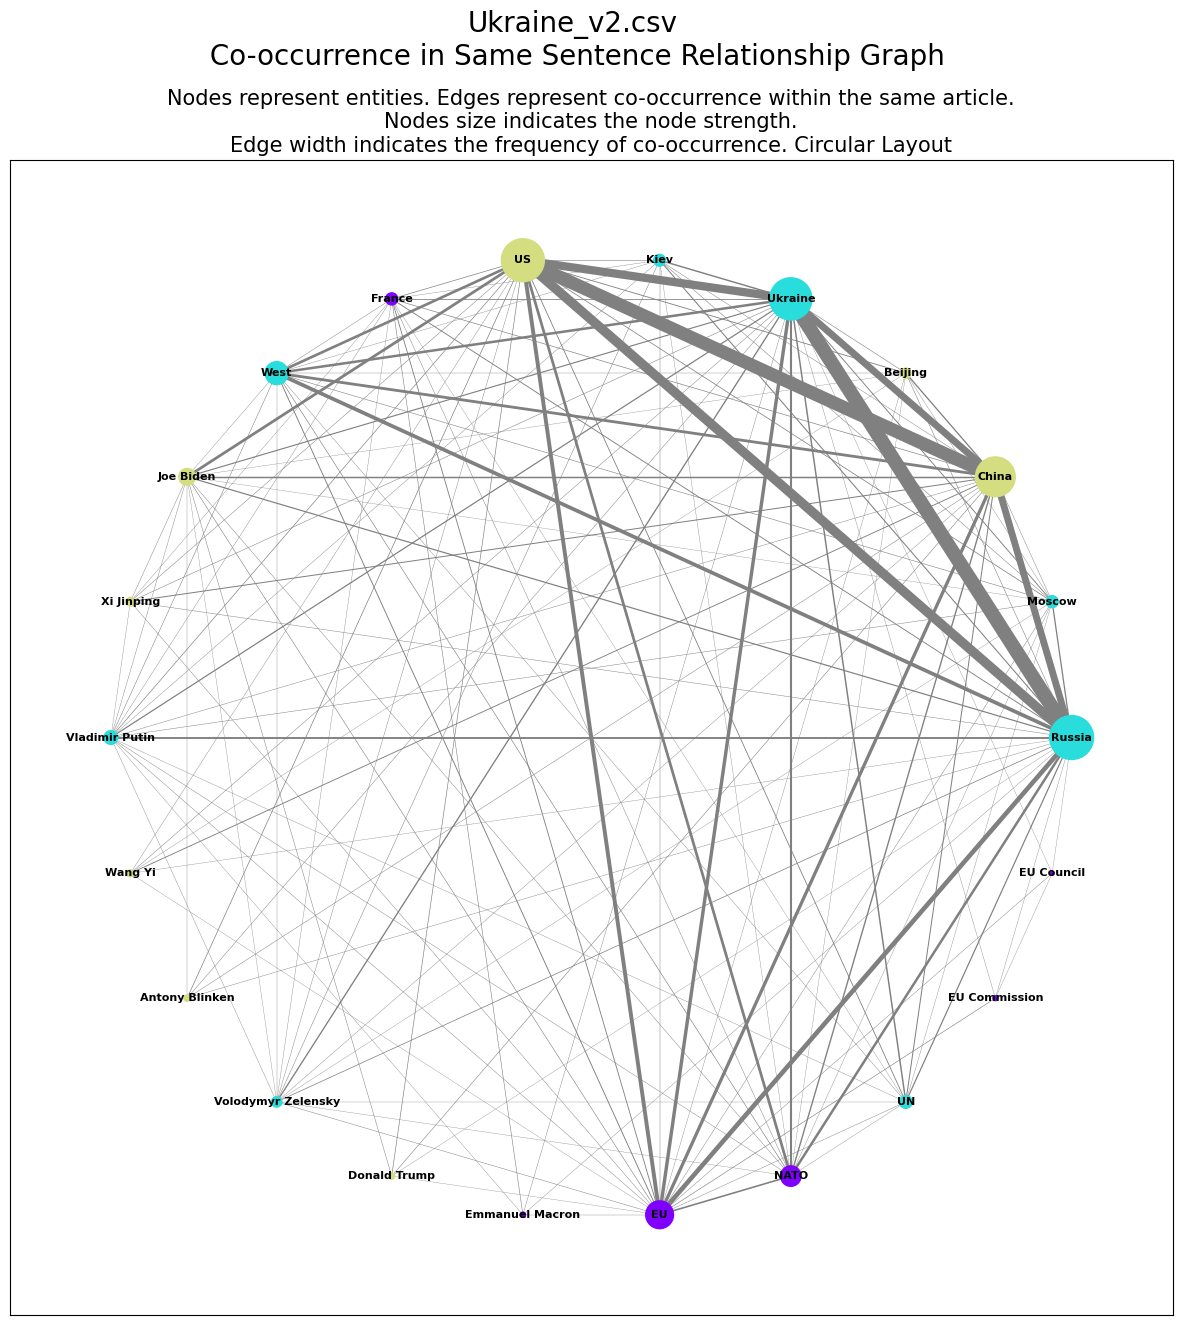

In [ ]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)

#get the community color map
communities = set(partition.values())
colors = [plt.cm.rainbow(i / len(communities)) for i in range(len(communities))]
node_colors = [colors[partition[node]] for node in G.nodes]

#draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.rainbow, node_color=node_colors)

#draw edges with normalized weights
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')

#draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

#labels = nx.get_edge_attributes(G, 'weight')
#x.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

#add title and show plot
plt.suptitle("Ukraine_v2.csv\n Co-occurrence in Same Sentence Relationship Graph", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nNodes size indicates the node strength.\nEdge width indicates the frequency of co-occurrence. Circular Layout", fontsize=15)
plt.show()

# Relationship with co-occurence based in same article

In [ ]:
#initialize graph
G = nx.Graph()

#add nodes for each entity
for entity in entities:
    G.add_node(entity)

In [ ]:
co_occurrence = defaultdict(int)

#iterate through each article in the preprocessed dataset
for article in preprocessed_data['article_text']:
    #find all entities present in the article
    present_entities = [entity for entity in entities if entity in article]
    #print(present_entities)

    #track co-occurrences within the article
    for i in range(len(present_entities)):
        for j in range(i + 1, len(present_entities)):
            co_occurrence[(present_entities[i], present_entities[j])] += 1
            #print(co_occurrence)

In [ ]:
co_occurrence

defaultdict(int,
            {('Russia', 'Moscow'): 243,
             ('Russia', 'China'): 816,
             ('Russia', 'Ukraine'): 1345,
             ('Russia', 'Kiev'): 226,
             ('Russia', 'US'): 861,
             ('Russia', 'France'): 215,
             ('Russia', 'West'): 546,
             ('Russia', 'Vladimir Putin'): 238,
             ('Russia', 'Emmanuel Macron'): 53,
             ('Russia', 'EU'): 570,
             ('Russia', 'NATO'): 324,
             ('Moscow', 'China'): 144,
             ('Moscow', 'Ukraine'): 245,
             ('Moscow', 'Kiev'): 90,
             ('Moscow', 'US'): 183,
             ('Moscow', 'France'): 57,
             ('Moscow', 'West'): 142,
             ('Moscow', 'Vladimir Putin'): 105,
             ('Moscow', 'Emmanuel Macron'): 17,
             ('Moscow', 'EU'): 137,
             ('Moscow', 'NATO'): 89,
             ('China', 'Ukraine'): 973,
             ('China', 'Kiev'): 98,
             ('China', 'US'): 789,
             ('China', 'France

In [ ]:
#define a threshold for edge weights for visualization purposes
weight_threshold = 10

In [ ]:
#add edges with weights to the graph, filtering by the threshold
selected_edges = []
for (entity1, entity2), weight in co_occurrence.items():
    if weight >= weight_threshold:
        G.add_edge(entity1, entity2, weight=weight)
        selected_edges.append((entity1, entity2, weight))

In [ ]:
selected_edges

[('Russia', 'Moscow', 243),
 ('Russia', 'China', 816),
 ('Russia', 'Ukraine', 1345),
 ('Russia', 'Kiev', 226),
 ('Russia', 'US', 861),
 ('Russia', 'France', 215),
 ('Russia', 'West', 546),
 ('Russia', 'Vladimir Putin', 238),
 ('Russia', 'Emmanuel Macron', 53),
 ('Russia', 'EU', 570),
 ('Russia', 'NATO', 324),
 ('Moscow', 'China', 144),
 ('Moscow', 'Ukraine', 245),
 ('Moscow', 'Kiev', 90),
 ('Moscow', 'US', 183),
 ('Moscow', 'France', 57),
 ('Moscow', 'West', 142),
 ('Moscow', 'Vladimir Putin', 105),
 ('Moscow', 'Emmanuel Macron', 17),
 ('Moscow', 'EU', 137),
 ('Moscow', 'NATO', 89),
 ('China', 'Ukraine', 973),
 ('China', 'Kiev', 98),
 ('China', 'US', 789),
 ('China', 'France', 124),
 ('China', 'West', 471),
 ('China', 'Vladimir Putin', 119),
 ('China', 'Emmanuel Macron', 27),
 ('China', 'EU', 452),
 ('China', 'NATO', 266),
 ('Ukraine', 'Kiev', 246),
 ('Ukraine', 'US', 987),
 ('Ukraine', 'France', 237),
 ('Ukraine', 'West', 594),
 ('Ukraine', 'Vladimir Putin', 238),
 ('Ukraine', 'Emmanu

In [ ]:
#calculate node strength -- the sum of the weights of edges connected to them
node_strength = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes}
max_strength = max(node_strength.values())

In [ ]:
#normalize node sizes based on their strength
node_sizes = [node_strength[node] / max_strength * 1000 for node in G.nodes]

In [ ]:
#apply the Louvain method for community detection
partition = community_louvain.best_partition(G, weight='weight')

In [ ]:
partition

{'Russia': 0,
 'Moscow': 1,
 'China': 0,
 'Beijing': 0,
 'Ukraine': 0,
 'Kiev': 1,
 'US': 0,
 'France': 1,
 'West': 0,
 'Joe Biden': 0,
 'Xi Jinping': 0,
 'Vladimir Putin': 1,
 'Wang Yi': 0,
 'Antony Blinken': 0,
 'Volodymyr Zelensky': 1,
 'Donald Trump': 0,
 'Emmanuel Macron': 1,
 'EU': 0,
 'NATO': 0,
 'UN': 0,
 'EU Commission': 1,
 'EU Council': 0}

In [ ]:
#add the community information to the graph
for node, community in partition.items():
    G.nodes[node]['community'] = community

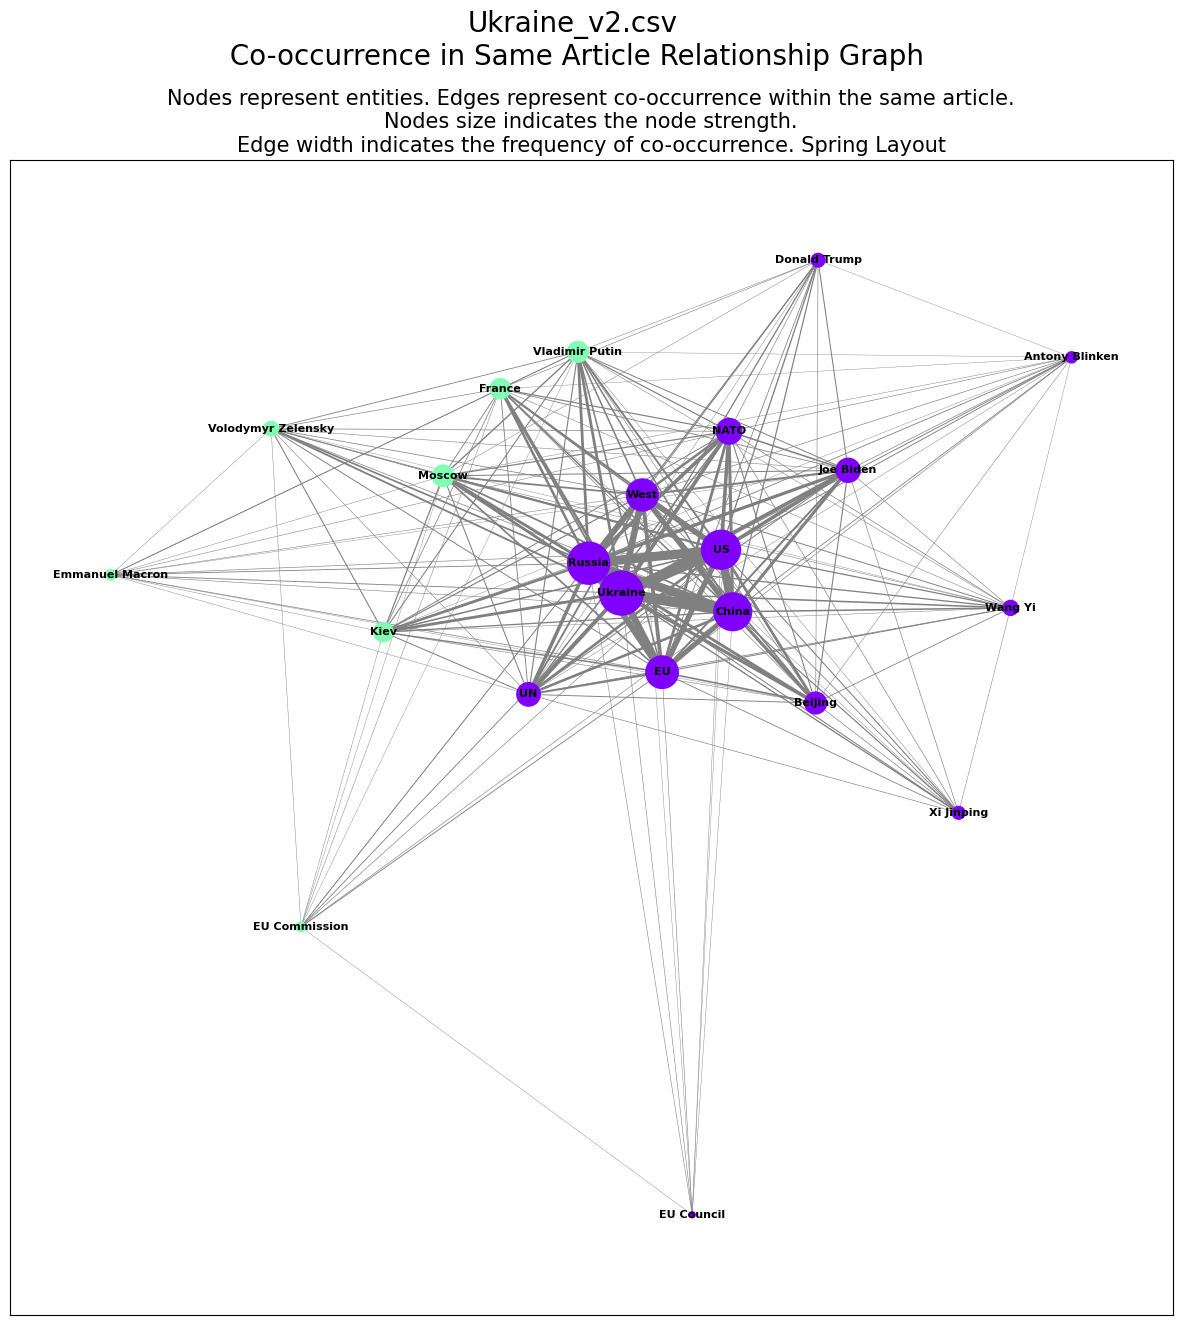

In [ ]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)

#get the community color map
communities = set(partition.values())
colors = [plt.cm.rainbow(i / len(communities)) for i in range(len(communities))]
node_colors = [colors[partition[node]] for node in G.nodes]

#draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.rainbow, node_color=node_colors)

#draw edges with normalized weights
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')

#draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

#add title and show plot
plt.suptitle("Ukraine_v2.csv\n Co-occurrence in Same Article Relationship Graph", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nNodes size indicates the node strength.\nEdge width indicates the frequency of co-occurrence. Spring Layout", fontsize=15)
plt.show()

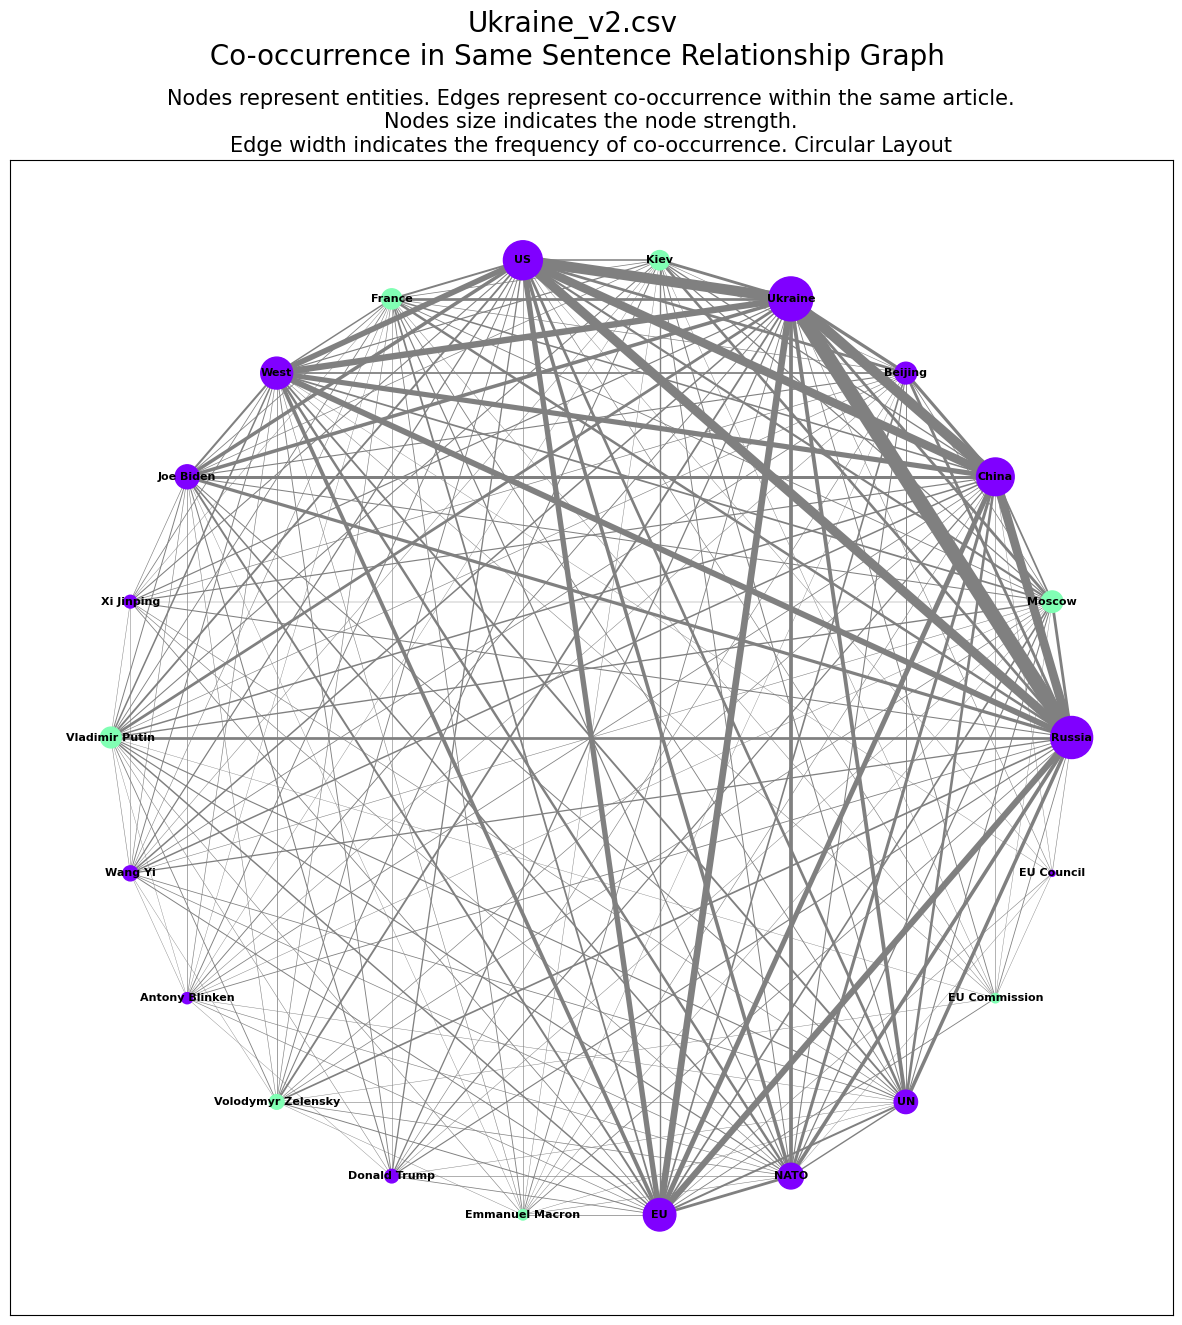

In [ ]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)

#community color map
communities = set(partition.values())
colors = [plt.cm.rainbow(i / len(communities)) for i in range(len(communities))]
node_colors = [colors[partition[node]] for node in G.nodes]

#nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.rainbow, node_color=node_colors)

#edges with normalized weights
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')

#labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

#labels = nx.get_edge_attributes(G, 'weight')
#x.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

#title
plt.suptitle("Ukraine_v2.csv\n Co-occurrence in Same Sentence Relationship Graph", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nNodes size indicates the node strength.\nEdge width indicates the frequency of co-occurrence. Circular Layout", fontsize=15)
plt.show()